<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

# Google Store App Rating Prediction

## Problem statement

The Play Store apps data has enormous potential to drive app-making businesses to success. However, many apps are being developed every single day and only a few of them become profitable.  It is important for developers to be able to predict the success of their app and incorporate features which makes an app successful.
We can collect app data and user ratings from the app stores and use it to extract insightful information.
A machine learning model can be used to predict rating for a given app, which can be used to estimate success and scope of improvement. 


As part of this exercise we will try to predict rating for an app given features like size, number of downloads, etc.



## Data Set Information

Shape - 10841 entries and 13 columns

Attributes - 

App: Application name

Category: Category the app belongs to

Rating: Overall user rating of the app 

Reviews: Number of user reviews for the app

Size: Size of the app 

Installs: Number of user downloads/installs for the app 

Type: Paid or Free

Price: Price of the app 

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store 

Current Ver: Current version of the app available on Play Store 

Android Ver: Min required Android version 


Mount Drive (if using Colab)

In [231]:
from google.colab import drive

ModuleNotFoundError: No module named 'google'

In [ ]:
drive.mount('/content/gdrive')

## 1.Import Pandas and Read the Dataset

In [244]:
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')

data = pd.read_csv('/Users/Shiva/Desktop/python/AllLabs/Apps_data.csv')

In [245]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 2. EDA and Preprocessing

### 2.1 Check info and summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [247]:
data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
##1.  There might be some outliers in the Rating column
##2.  Reviews -- 596 apps has no reviews
##3.  A lot of apps has 1M installs
##4.  Some apps size varies with device
##5.  There are 120 different type of Genres, but it may not be significant for this study.
##6.  Current ver and Android ver may not be significant for this study


Sample 5 examples from the Rating column

In [249]:
data.Rating.sample(5)

533      3.3
2640     4.0
9255     NaN
5153     4.0
10302    4.2
Name: Rating, dtype: float64

Check for NaN values

In [250]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Check summary statistics of the numerical columns in the dataframe

In [251]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### 2.2 App Column

Let's look closely at the apps in the data 

In [252]:
data.App.unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [253]:
data.App.value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
ESPN                                                 7
                                                    ..
VTB-Online                                           1
iFish BC                                             1
Fr Lupupa Sermons                                    1
Ultimate Chest Tracker                               1
Upgrade for Android DU Master                        1
Name: App, Length: 9660, dtype: int64

Take 3 sample Apps for exploration (for eg: 'ROBLOX', 'ESPN','Nick')

In [254]:
data[data['App'].isin(['ROBLOX', 'ESPN','Nick'])].sort_values(by=['App', 'Reviews'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
917,Nick,ENTERTAINMENT,4.2,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
937,Nick,ENTERTAINMENT,4.2,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
963,Nick,ENTERTAINMENT,4.2,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up


Drops other duplicate entries keeping the App with the highest reviews

In [255]:
data = data.sort_values(by=['App', "Reviews"])
data.drop_duplicates('App', keep='last', inplace=True)

Verify that duplicates has been removed

In [256]:
data[data['App'].isin(['ROBLOX', 'ESPN','Nick'])].sort_values(by=['App', 'Reviews'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
2226,Nick,FAMILY,4.2,123322,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


Check shape of the dataframe

In [257]:
data.shape

(9660, 13)

### 2.2 Category Column

Check out the App categories

In [258]:
data['Category'].value_counts()

FAMILY                 1880
GAME                    942
TOOLS                   828
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               106
ENTERTAINMENT            86
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

Drop the category named 1.9, unknown category and invalid category

In [259]:

 data = data.drop(data[data['Category']=='1.9'].index, axis =0) 
    

In [260]:
data['Category'].value_counts()

FAMILY                 1880
GAME                    942
TOOLS                   828
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               106
ENTERTAINMENT            86
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

Visualize App category column

<AxesSubplot:>

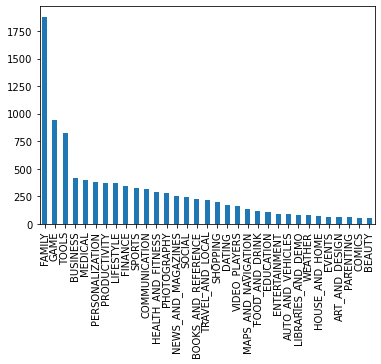

In [261]:
data['Category'].value_counts().plot(kind='bar')

### 2.3 Rating Column

Check summary statistics of Rating column

In [262]:
data['Rating'].describe()

count    8196.000000
mean        4.173084
std         0.536522
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Check the rating distribution

<AxesSubplot:xlabel='Rating', ylabel='Density'>

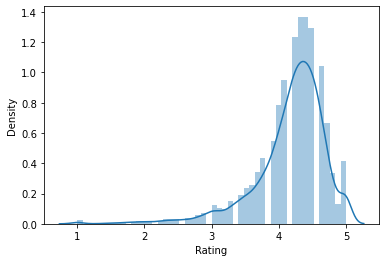

In [263]:
sns.distplot(data['Rating'])

Check the rating dataframe shape

In [264]:
data.shape

(9659, 13)

Check for null values in the rating dataframe

In [265]:
data.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Drop the NaN values

In [266]:
data = data.dropna()
data.shape

(8190, 13)

Convert ratings to high and low categories(>3.5 is high rest low)

In [267]:
rating_category = np.where(data['Rating'] <=3.5, 'Low', 'High')

Add the categorical column to the data 

In [268]:
data['Rating_cat'] = rating_category
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,High
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,Low
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,High
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,High
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,High


Check shape of the newly created dataframe

In [269]:
data.shape

(8190, 14)

Check for null columns

In [270]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Rating_cat        0
dtype: int64

Check count of high and low ratings

In [271]:
data['Rating_cat'].value_counts()

High    7317
Low      873
Name: Rating_cat, dtype: int64

Plot the same

<AxesSubplot:>

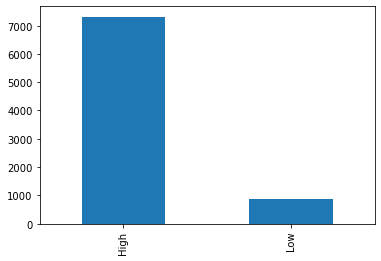

In [272]:
data['Rating_cat'].value_counts().plot(kind='bar')

### 2.4 Review Column

Convert Reviews to numeric

In [273]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors = 'coerce')

Check info

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 8532 to 882
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   int64  
 4   Size            8190 non-null   object 
 5   Installs        8190 non-null   object 
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   object 
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
 13  Rating_cat      8190 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 959.8+ KB


 Review distibution 

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

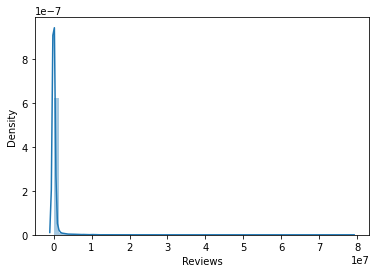

In [275]:
import seaborn as sns
sns.distplot(data['Reviews'])

### 2.5 Size Column

Working on Size column

The column currently contail alphanumeric values. 

In [276]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,High
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,Low
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,High
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,High
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,High


Check count

In [277]:
data['Size'].value_counts()

Varies with device    1169
14M                    148
12M                    146
13M                    143
11M                    143
                      ... 
378k                     1
23k                      1
655k                     1
779k                     1
720k                     1
Name: Size, Length: 413, dtype: int64

Replace M with 1 million and k with 1 thousand

In [278]:
data['Size'] = data['Size'].str.replace('M','000000')
data['Size'] = data['Size'].str.replace('k','000')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,High
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1000000,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,Low
4541,.R,TOOLS,4.5,259,203000,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,High
4636,/u/app,COMMUNICATION,4.7,573,53000000,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,High
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14000000,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,High


Check Size values counts

In [279]:
data['Size'].value_counts()

Varies with device    1169
14000000               148
12000000               146
13000000               143
11000000               143
                      ... 
121000                   1
270000                   1
251000                   1
103000                   1
975000                   1
Name: Size, Length: 413, dtype: int64

convert column to numeric, dropping non numeric values





In [280]:
data['Size'] = pd.to_numeric(data['Size'], errors = 'coerce')

Check info

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 8532 to 882
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   int64  
 4   Size            7021 non-null   float64
 5   Installs        8190 non-null   object 
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   object 
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
 13  Rating_cat      8190 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 959.8+ KB


Check for NaN values

In [282]:
data.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1169
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Rating_cat           0
dtype: int64

Impute the null values in "Size" column 

In [283]:
data['Size'].fillna(data['Size'].mode()[0], inplace=True)
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Rating_cat        0
dtype: int64

### 2.6 Install Column

Check value counts

In [284]:
data['Installs'].value_counts()

1,000,000+        1415
100,000+          1095
10,000+            985
10,000,000+        934
1,000+             696
5,000,000+         608
500,000+           503
50,000+            456
5,000+             424
100+               303
50,000,000+        203
500+               199
100,000,000+       188
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: Installs, dtype: int64

Replace , and + with space

In [285]:
data['Installs'] = data['Installs'].str.replace(',','').str.replace('+', '')
data.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000.0,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,High
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,Low
4541,.R,TOOLS,4.5,259,203000.0,10000,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,High
4636,/u/app,COMMUNICATION,4.7,573,53000000.0,10000,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,High
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14000000.0,100,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,High


Convert to numeric type

In [286]:
data['Installs'] = pd.to_numeric(data['Installs'], errors = 'coerce')

Check value counts

In [287]:
data['Installs'].value_counts()

1000000       1415
100000        1095
10000          985
10000000       934
1000           696
5000000        608
500000         503
50000          456
5000           424
100            303
50000000       203
500            199
100000000      188
10              69
50              56
500000000       24
1000000000      20
5                9
1                3
Name: Installs, dtype: int64

Check info

In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 8532 to 882
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   int64  
 4   Size            8190 non-null   float64
 5   Installs        8190 non-null   int64  
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   object 
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
 13  Rating_cat      8190 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 959.8+ KB


Get the bin levels

In [289]:
sort_data = data['Installs'].sort_values().unique()
sort_data

array([         1,          5,         10,         50,        100,
              500,       1000,       5000,      10000,      50000,
           100000,     500000,    1000000,    5000000,   10000000,
         50000000,  100000000,  500000000, 1000000000])

Create bins for Installs

In [290]:
#Create bins for Installs
data['Installs_cat'] = data['Installs'].replace(sort_data,range(0,len(sort_data),1), inplace = False )
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat,Installs_cat
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000.0,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,High,12
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,Low,8
4541,.R,TOOLS,4.5,259,203000.0,10000,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,High,8
4636,/u/app,COMMUNICATION,4.7,573,53000000.0,10000,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,High,8
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14000000.0,100,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,High,4


### 2.7 Type

Get value counts

In [291]:
data['Type'].value_counts()

Free    7588
Paid     602
Name: Type, dtype: int64

Plot pie chart for percentage of free vs paid app in store

<AxesSubplot:ylabel='Type'>

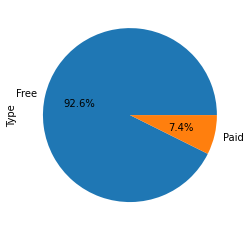

In [292]:
data['Type'].value_counts().plot(kind='pie', autopct = "%1.1f%%")

Check the columns and info

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 8532 to 882
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   int64  
 4   Size            8190 non-null   float64
 5   Installs        8190 non-null   int64  
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   object 
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
 13  Rating_cat      8190 non-null   object 
 14  Installs_cat    8190 non-null   int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 1023.8+ KB


### 2.8 Price

Check value counts

In [294]:
data['Price'].value_counts()

0          7588
$2.99       109
$0.99       103
$4.99        68
$1.99        59
           ... 
$1.97         1
$400.00       1
$2.56         1
$4.29         1
$8.49         1
Name: Price, Length: 73, dtype: int64

Replace $ with space

In [295]:
data['Price'] = data['Price'].str.replace('$', '')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat,Installs_cat
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000.0,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,High,12
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,Low,8
4541,.R,TOOLS,4.5,259,203000.0,10000,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,High,8
4636,/u/app,COMMUNICATION,4.7,573,53000000.0,10000,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,High,8
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14000000.0,100,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,High,4


convert column to numeric, dropping non numeric values

In [296]:
#convert column to numeric, dropping non numeric values
data['Price'] = pd.to_numeric(data['Price'], errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 8532 to 882
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   int64  
 4   Size            8190 non-null   float64
 5   Installs        8190 non-null   int64  
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   float64
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
 13  Rating_cat      8190 non-null   object 
 14  Installs_cat    8190 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 1023.8+ KB


Get summary statistics

In [297]:
data.describe()

,Rating,Reviews,Size,Installs,Price,Installs_cat
count,8190.000000,8.190000e+03,8.190000e+03,8.190000e+03,8190.000000,8190.000000
mean,4.173162,2.554323e+05,1.897180e+07,9.174798e+06,1.038342,10.123810
std,0.536589,1.986395e+06,2.250918e+07,5.827353e+07,16.864040,3.206045
min,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000
25%,4.000000,1.260000e+02,6.800000e+00,1.000000e+04,0.000000,8.000000
50%,4.300000,3.009500e+03,1.400000e+07,1.000000e+05,0.000000,10.000000
75%,4.500000,4.385075e+04,2.700000e+07,1.000000e+06,0.000000,12.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000,18.000000


## Data Preparation

Check info

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 8532 to 882
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   int64  
 4   Size            8190 non-null   float64
 5   Installs        8190 non-null   int64  
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   float64
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
 13  Rating_cat      8190 non-null   object 
 14  Installs_cat    8190 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 1023.8+ KB


Drop 'App','Content Rating','Genres','Last Updated', 'Current Ver','Android Ver' columns

In [299]:
data = data.drop([ 'App','Content Rating','Genres','Last Updated', 'Current Ver','Android Ver'], axis=1)
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Rating_cat,Installs_cat
8532,SOCIAL,4.5,40467,22000000.0,1000000,Free,0.0,High,12
324,COMICS,3.5,115,9.1,10000,Free,0.0,Low,8
4541,TOOLS,4.5,259,203000.0,10000,Free,0.0,High,8
4636,COMMUNICATION,4.7,573,53000000.0,10000,Free,0.0,High,8
5940,NEWS_AND_MAGAZINES,4.4,27,14000000.0,100,Free,0.0,High,4


In [300]:
#data=pd.concat([data,pd.get_dummies(data['Type'],prefix='Type')],axis=1).drop(['Type'],axis=1)
data=pd.concat([data,pd.get_dummies(data['Category'],prefix='Category')],axis=1).drop(['Category'],axis=1)
data=pd.concat([data,pd.get_dummies(data['Type'],prefix='Type')],axis=1).drop(['Type'],axis=1)
data=pd.concat([data,pd.get_dummies(data['Rating_cat'],prefix='Rating_cat')],axis=1).drop(['Rating_cat'],axis=1)


In [301]:
data.head()

,Rating,Reviews,Size,Installs,Price,Installs_cat,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Rating_cat_High,Rating_cat_Low
8532,4.5,40467,22000000.0,1000000,0.0,12,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
324,3.5,115,9.1,10000,0.0,8,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4541,4.5,259,203000.0,10000,0.0,8,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4636,4.7,573,53000000.0,10000,0.0,8,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5940,4.4,27,14000000.0,100,0.0,4,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Drop 'Rating_cat_Low','Rating' columns for feature and make 'Rating_cat_Low' as target

In [302]:
X = data.drop(['Rating_cat_Low', 'Rating'], axis = 1)
y = data['Rating_cat_Low']


Split train and test samples(Split size = 0.3 and random_state = 42)

In [303]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5733, 41) (2457, 41)
(5733,) (2457,)


In [304]:
#do scaling and normalizing the code before building the model...as a good practice 
#remove all the categorical values as zscore is not done for categories 



from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xTrainSt = sc.fit_transform(X_train)
#.....will figure out the best fit line
xTestSt = sc.transform(X_test)
#-------the fit is already set for train set, so no need to refit for Test data





## Model Building

### 4.1 Classification

Write a function to fit and print the model predictions, input parameters would be model, X_train, X_test, y_train and y_test

In [305]:

      
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def fit_n_print(model,X_train,X_test,y_train,y_test):

  model.fit(X_train,y_train)

  pred = model.predict(X_test)

  train_score = model.score(X_train,y_train)
  test_score = model.score(X_test, y_test)

  print("Train Score:", train_score)
  print("Test Score:", test_score)
  print(confusion_matrix(y_test,pred))
  print(classification_report(y_test,pred))
    


## Results

### 5.1 Logistic Regression

Pass logistic regression model into the function 

In [310]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

fit_n_print(lr,xTrainSt, xTestSt,y_train, y_test)

Train Score: 1.0
Test Score: 1.0
[[2181    0]
 [   0  276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2181
           1       1.00      1.00      1.00       276

    accuracy                           1.00      2457
   macro avg       1.00      1.00      1.00      2457
weighted avg       1.00      1.00      1.00      2457



### 5.2 KNN
Pass KNN classifier into the function"

In [307]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

fit_n_print(lr,xTrainSt, xTestSt,y_train, y_test)


Train Score: 1.0
Test Score: 1.0
[[2181    0]
 [   0  276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2181
           1       1.00      1.00      1.00       276

    accuracy                           1.00      2457
   macro avg       1.00      1.00      1.00      2457
weighted avg       1.00      1.00      1.00      2457



### 5.3 SVM

Pass SVM classifier into the function

In [308]:
from sklearn.svm import SVC
svc = SVC()
fit_n_print(svc,xTrainSt, xTestSt,y_train, y_test)

Train Score: 0.9991278562707134
Test Score: 0.9967439967439967
[[2181    0]
 [   8  268]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2181
           1       1.00      0.97      0.99       276

    accuracy                           1.00      2457
   macro avg       1.00      0.99      0.99      2457
weighted avg       1.00      1.00      1.00      2457



## Conclusion

Infer your predictions and write down your observations

In [ ]:
1.  Its highly unbalanced data.
2.  Very poor biased data